In [1]:
# Selenium
#import requests
from bs4 import BeautifulSoup
import urllib
import nltk
import spacy

In [2]:
text_file = urllib.request.urlopen("https://edition.cnn.com/europe/live-news/russia-ukraine-war-news-09-05-22/index.html")

response = text_file.read()
soup = BeautifulSoup(response, 'html.parser')
text = soup.get_text()
text = text.lower()

In [3]:
print(text[1400:2000])

made progress, with the military taking two settlements in the south and another in donetsk in the east. the last operating reactor at the zaporizhzhia nuclear power plant has disconnected from the ukrainian grid as a result of a fire caused by russian shelling, the country’s nuclear agency said monday. the development comes as two iaea inspectors remain at the plant as part of a un nuclear watchdog mission. plans to hold a referendum — criticized by us and ukrainian officials as a sham — for kherson region to join russia are on hold, a pro-russian official said. concerns are growing over ener


In [4]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [5]:
from nltk.stem.porter import *
import re

In [6]:
sw = set(stopwords.words('english'))
stemmer =PorterStemmer()

In [13]:
def preprocess(string):
    ###
    # Deixa apenas elementos alfanuméricos
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # deixa todas as palavras minúsculas
    string = string.lower()
    ###
    # tokenização
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = [word for word in words if word not in sw and len(word) <= 10]

    # Aplica o Stemming
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    ###
    # Retorna a lista de palavras pré-processadas
    return stem_words

In [14]:
text2 = preprocess(text)

In [15]:
text2

['septemb',
 '5',
 '2022',
 'russia',
 'ukrain',
 'newsopen',
 'eastunit',
 'eastunit',
 'oleditionu',
 'eastunit',
 'kingdomu',
 'biden',
 'firstu',
 'tv',
 'digit',
 'studioscnn',
 'filmshlntv',
 'scheduletv',
 'show',
 'equalscal',
 'africa2',
 'degreescnn',
 'heroesal',
 'cnnfollow',
 'cnn',
 'septemb',
 '5',
 '2022',
 'russia',
 'ukrain',
 'newsbi',
 'aditi',
 'sangal',
 'ami',
 'woodyatt',
 'simon',
 'mccarthi',
 'tara',
 'maureen',
 'chowdhuri',
 'cnnupdat',
 '2259',
 'gmt',
 '0659',
 'hkt',
 'septemb',
 '5',
 '2022what',
 'cover',
 'volodymyr',
 'zelenski',
 'say',
 'ukrainian',
 'offens',
 'made',
 'progress',
 'militari',
 'take',
 'two',
 'south',
 'anoth',
 'donetsk',
 'east',
 'last',
 'oper',
 'reactor',
 'nuclear',
 'power',
 'plant',
 'ukrainian',
 'grid',
 'result',
 'fire',
 'caus',
 'russian',
 'shell',
 'countri',
 'nuclear',
 'agenc',
 'said',
 'monday',
 'come',
 'two',
 'iaea',
 'inspector',
 'remain',
 'plant',
 'part',
 'un',
 'nuclear',
 'watchdog',
 'mission'

In [16]:
text3 = ' '.join(text2)

In [17]:
print(text3)

septemb 5 2022 russia ukrain newsopen eastunit eastunit oleditionu eastunit kingdomu biden firstu tv digit studioscnn filmshlntv scheduletv show equalscal africa2 degreescnn heroesal cnnfollow cnn septemb 5 2022 russia ukrain newsbi aditi sangal ami woodyatt simon mccarthi tara maureen chowdhuri cnnupdat 2259 gmt 0659 hkt septemb 5 2022what cover volodymyr zelenski say ukrainian offens made progress militari take two south anoth donetsk east last oper reactor nuclear power plant ukrainian grid result fire caus russian shell countri nuclear agenc said monday come two iaea inspector remain plant part un nuclear watchdog mission plan hold referendum critic us ukrainian offici sham kherson region join russia hold pro russian offici said concern grow energi suppli europ russia gazprom said would resum natur ga export key pipelin plan share emailshar link25 postssort arrow1 hr 5 min agoour live coverag end read today post share emailshar link3 hr 26 min russian 300 missil destroy ukrainian a

In [18]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

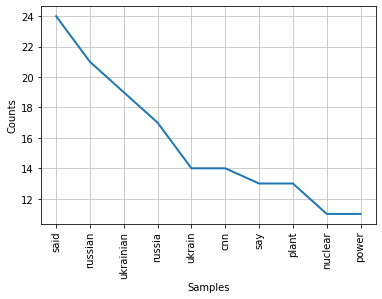

In [19]:
#Estabelecendo a freq.
fdist = FreqDist(text2)

#Colocando as 10 palavras mais comuns
fdist.plot(10)
plt.show()

In [20]:
from wordcloud import WordCloud

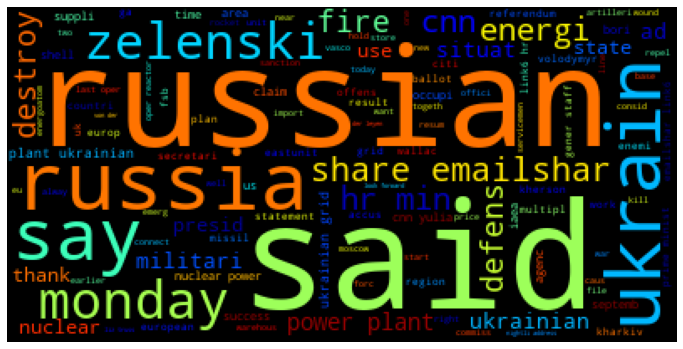

In [21]:
#Gerando a nuvem
wordcloud = WordCloud(background_color='black',colormap='jet').generate(text3)

#Plotando a nuvem
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#Removendo os eixos
plt.axis("off")
plt.show()